In [1]:
! pip install -U pandas matplotlib seaborn

In [2]:
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
import glob # For finding files matching a pattern
import os   # For path manipulation (optional, but useful for more complex scenarios)

directory_path = 'data/stocks/' # Replace with your actual directory
file_pattern = os.path.join(directory_path, '*.csv') # Matches all .csv files
csv_files = glob.glob(file_pattern)

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
import os

# Extract ticker symbol from file path and add as a column to each dataframe before concatenation
# Since combined_df is already created, let's reconstruct the ticker info

# Create a mapping from file path to ticker

# Build a mapping from file path to ticker
file_to_ticker = {f: os.path.splitext(os.path.basename(f))[0] for f in csv_files}

# Create a Series of tickers for each row in combined_df
# First, build a list of ticker for each row in each original df, then concatenate
ticker_list = []
for file, df_part in zip(csv_files, dfs):
    ticker = file_to_ticker[file]
    ticker_list.extend([ticker] * len(df_part))  # Fix: use len(df_part) instead of len(dfs)

# Add the ticker column to combined_stocks_with_sp500
combined_df = combined_df.copy()
combined_df['Ticker'] = ticker_list

# Group by year and month, count unique tickers
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.month

In [5]:
# Filter combined_df for years between 2000 and 2020 (inclusive)
tickers_2000_2020_df = combined_df[(combined_df['Year'] >= 2000) & (combined_df['Year'] <= 2020)]
tickers_2000_2020_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month
30,2000-01-03,56.330471,56.464592,48.193848,51.502148,44.294170,4674300.0,A,2000,1
31,2000-01-04,48.730328,49.266811,46.316166,47.567955,40.910591,4765000.0,A,2000,1
32,2000-01-05,47.389126,47.567955,43.141987,44.617310,38.372894,5758600.0,A,2000,1
33,2000-01-06,44.080830,44.349072,41.577251,42.918453,36.911816,2534400.0,A,2000,1
34,2000-01-07,42.247852,47.165592,42.203148,46.494991,39.987797,2819600.0,A,2000,1
...,...,...,...,...,...,...,...,...,...,...
24197437,2020-03-26,10.230000,11.430000,10.230000,11.100000,11.100000,189500.0,ZYXI,2020,3
24197438,2020-03-27,10.700000,10.980000,10.060000,10.300000,10.300000,145000.0,ZYXI,2020,3
24197439,2020-03-30,10.160000,11.060000,10.160000,10.800000,10.800000,162300.0,ZYXI,2020,3
24197440,2020-03-31,10.680000,11.140000,10.590000,11.070000,11.070000,280400.0,ZYXI,2020,3


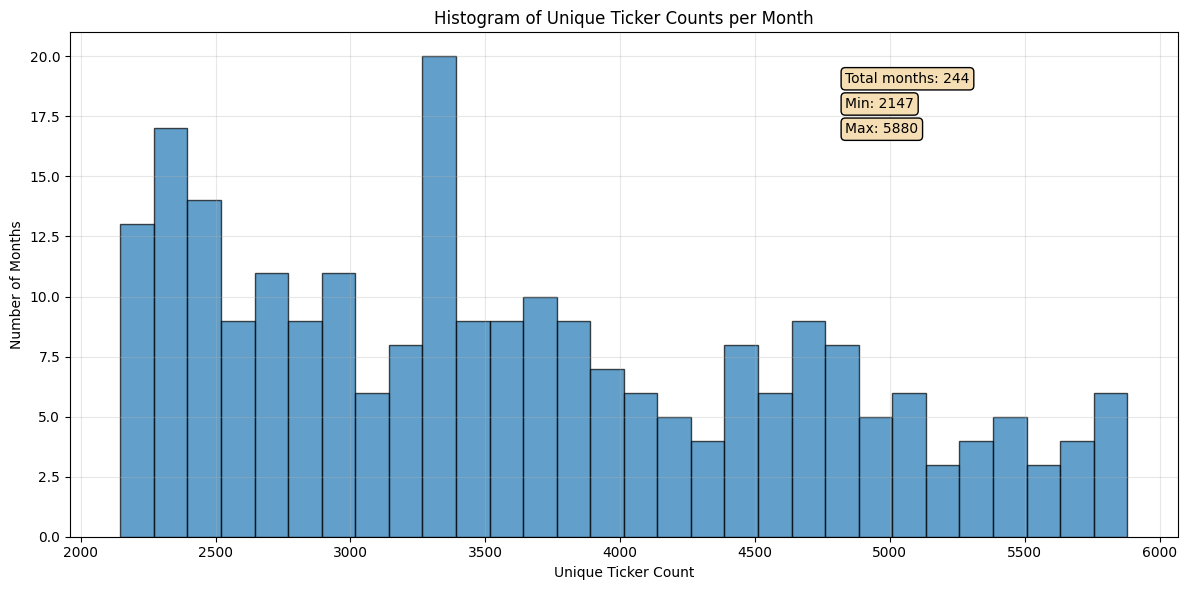

First few bin edges: [2147.         2271.43333333 2395.86666667 2520.3        2644.73333333]
Last few bin edges: [5382.26666667 5506.7        5631.13333333 5755.56666667 5880.        ]


In [6]:
unique_ticker_counts = (
    tickers_2000_2020_df.groupby(['Year', 'Month'])['Ticker']
    .nunique()
    .reset_index(name='UniqueTickerCount')
)
# Create a better histogram with more appropriate binning
plt.figure(figsize=(12, 6))

# Use bins that start from the minimum value
min_val = unique_ticker_counts['UniqueTickerCount'].min()
max_val = unique_ticker_counts['UniqueTickerCount'].max()

# Create 30 bins from min to max
bins = plt.hist(unique_ticker_counts['UniqueTickerCount'], bins=30, 
                edgecolor='black', alpha=0.7)

plt.title('Histogram of Unique Ticker Counts per Month')
plt.xlabel('Unique Ticker Count')
plt.ylabel('Number of Months')
plt.grid(True, alpha=0.3)

# Add some statistics as text
plt.text(0.7, 0.9, f'Total months: {len(unique_ticker_counts)}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
plt.text(0.7, 0.85, f'Min: {min_val}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
plt.text(0.7, 0.8, f'Max: {max_val}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

plt.tight_layout()
plt.show()

# Print the first few bin edges to see what the leftmost bar represents
print("First few bin edges:", bins[1][:5])
print("Last few bin edges:", bins[1][-5:])

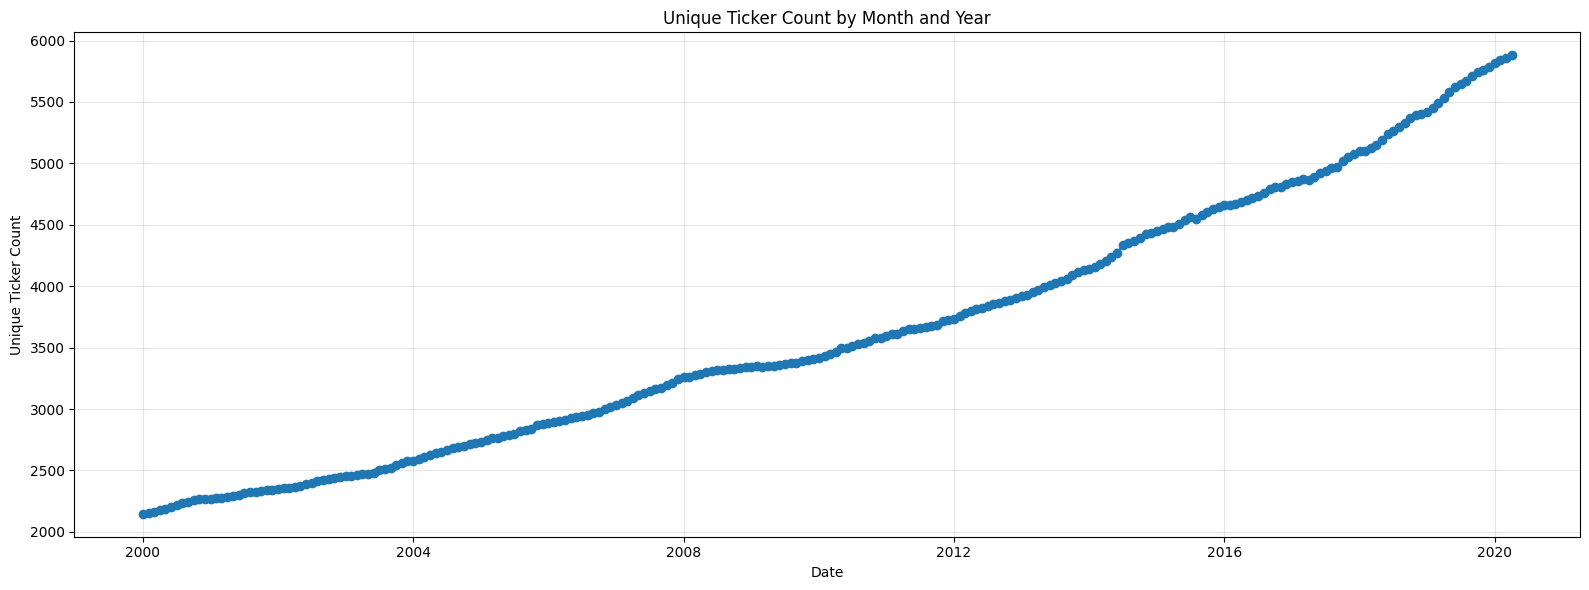

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(
    pd.to_datetime(unique_ticker_counts['Year'].astype(str) + '-' + unique_ticker_counts['Month'].astype(str) + '-01'),
    unique_ticker_counts['UniqueTickerCount'],
    marker='o', linestyle='-'
)
plt.title('Unique Ticker Count by Month and Year')
plt.xlabel('Date')
plt.ylabel('Unique Ticker Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
meta_df = pd.read_csv('data/symbols_valid_meta.csv')
meta_df

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Y,ZUO,"Zuora, Inc. Class A Common Stock",N,,N,100.0,N,NaN,ZUO,ZUO,N
8045,Y,ZVO,Zovio Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,ZVO,N
8046,Y,ZYME,Zymeworks Inc. Common Shares,N,,N,100.0,N,NaN,ZYME,ZYME,N
8047,Y,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,ZYNE,N


In [9]:
stocks_df = pd.merge(left=tickers_2000_2020_df, right= meta_df, left_on='Ticker', right_on='NASDAQ Symbol', how='left')
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,...,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,2000-01-03,56.330471,56.464592,48.193848,51.502148,44.294170,4674300.0,A,2000,1,...,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,2000-01-04,48.730328,49.266811,46.316166,47.567955,40.910591,4765000.0,A,2000,1,...,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
2,2000-01-05,47.389126,47.567955,43.141987,44.617310,38.372894,5758600.0,A,2000,1,...,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
3,2000-01-06,44.080830,44.349072,41.577251,42.918453,36.911816,2534400.0,A,2000,1,...,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
4,2000-01-07,42.247852,47.165592,42.203148,46.494991,39.987797,2819600.0,A,2000,1,...,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18373353,2020-03-26,10.230000,11.430000,10.230000,11.100000,11.100000,189500.0,ZYXI,2020,3,...,"Zynex, Inc. - Common Stock",Q,S,N,100.0,N,N,NaN,ZYXI,N
18373354,2020-03-27,10.700000,10.980000,10.060000,10.300000,10.300000,145000.0,ZYXI,2020,3,...,"Zynex, Inc. - Common Stock",Q,S,N,100.0,N,N,NaN,ZYXI,N
18373355,2020-03-30,10.160000,11.060000,10.160000,10.800000,10.800000,162300.0,ZYXI,2020,3,...,"Zynex, Inc. - Common Stock",Q,S,N,100.0,N,N,NaN,ZYXI,N
18373356,2020-03-31,10.680000,11.140000,10.590000,11.070000,11.070000,280400.0,ZYXI,2020,3,...,"Zynex, Inc. - Common Stock",Q,S,N,100.0,N,N,NaN,ZYXI,N


In [10]:
# remove rows with NaN in 'Open' column and filter out 'Test Issue' and 'ETF'
stocks_df = stocks_df.dropna(subset=['Open'])
stocks_df = stocks_df[(stocks_df['Test Issue'] != 'Y') & (stocks_df['ETF'] != 'Y')].copy()
stocks_df = stocks_df[
    (stocks_df['Test Issue'] != 'Y') &
    (stocks_df['ETF'] != 'Y') &
    (stocks_df['Nasdaq Traded'] == 'Y') &
    (stocks_df['Financial Status'] == 'N')  # only financially normal
]
stocks_df.shape

(7940041, 22)

In [11]:
sp500_df = pd.read_csv('data/sp500_full.csv')
sp500_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date Added,CIK,Founded
0,MMM,|3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,|A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,|Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,|AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,|Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
239,WBD,|Warner Bros. Discovery,Communication Services,Broadcasting,"New York City, New York",2022-04-11,1437107,2022 (Warner Bros. 1923)
240,WM,"|Waste Management, Inc.|Waste Management",Industrials,Environmental & Facilities Services,"Houston, Texas",1998-08-31,823768,1968
241,WAT,|Waters Corporation,Health Care,Life Sciences Tools & Services,"Milford, Massachusetts",2002-01-02,1000697,1958
242,XEL,|Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909


In [12]:
stocks_with_sp500 = pd.merge(left=stocks_df,right=sp500_df, left_on='Symbol', right_on='Symbol', how='left')
stocks_with_sp500

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,...,CQS Symbol,NASDAQ Symbol,NextShares,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date Added,CIK,Founded
0,2019-03-11,1.08,1.10,1.08,1.08,1.08,32100.0,AACG,2019,3,...,NaN,AACG,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-12,1.08,1.09,1.05,1.05,1.05,20200.0,AACG,2019,3,...,NaN,AACG,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-13,1.06,1.08,1.04,1.07,1.07,23100.0,AACG,2019,3,...,NaN,AACG,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-03-14,1.06,1.11,1.06,1.08,1.08,29900.0,AACG,2019,3,...,NaN,AACG,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-15,1.06,1.08,1.04,1.04,1.04,30900.0,AACG,2019,3,...,NaN,AACG,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940036,2020-03-26,10.23,11.43,10.23,11.10,11.10,189500.0,ZYXI,2020,3,...,NaN,ZYXI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7940037,2020-03-27,10.70,10.98,10.06,10.30,10.30,145000.0,ZYXI,2020,3,...,NaN,ZYXI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7940038,2020-03-30,10.16,11.06,10.16,10.80,10.80,162300.0,ZYXI,2020,3,...,NaN,ZYXI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7940039,2020-03-31,10.68,11.14,10.59,11.07,11.07,280400.0,ZYXI,2020,3,...,NaN,ZYXI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import pandas as pd
import numpy as np

def drop_broken_tickers(df, price_col='Close', min_days=100, min_median_price=1.0,
                        max_zero_ratio=0.02, max_volatility=0.5, max_price_ratio=1000,
                        min_price_ratio=50, max_flat_period=0.15):
    """
    Drop tickers with broken price data or extreme volatility.
    
    Parameters:
    - max_price_ratio: maximum ratio between max and min price (to catch extreme price swings)
    - min_price_ratio: minimum ratio to flag as suspicious (catches moderate drops)
    - max_flat_period: maximum fraction of days that can have the same price
    """
    def is_broken(sub_df):
        if len(sub_df) < min_days:
            return True
        if sub_df[price_col].median() < min_median_price:
            return True
        
        # Check for zero/near-zero prices (more strict threshold)
        zero_ratio = (sub_df[price_col] <= 0.01).mean()
        if zero_ratio > max_zero_ratio:
            return True
        
        # Check for extreme price ratios (max/min > threshold)
        price_min = sub_df[price_col].min()
        price_max = sub_df[price_col].max()
        if price_min > 0 and (price_max / price_min) > max_price_ratio:
            return True
        
        # Check for suspicious moderate price drops combined with flat periods
        if price_min > 0 and (price_max / price_min) > min_price_ratio:
            # Additional check: look for extended flat periods at low prices
            low_price_threshold = price_min * 1.1  # Within 10% of minimum
            low_price_days = (sub_df[price_col] <= low_price_threshold).sum()
            if low_price_days / len(sub_df) > max_flat_period:
                return True
            
        # Check if last price is near zero
        if sub_df[price_col].iloc[-1] <= 0.01:
            return True
            
        # Check for volatility (compute it here to avoid groupby issues)
        sub_df_sorted = sub_df.sort_values('Date')
        returns = np.log(sub_df_sorted[price_col]) - np.log(sub_df_sorted[price_col].shift(1))
        volatility = returns.std()
        if pd.notna(volatility) and volatility > max_volatility:
            return True
        
        # Check for long price plateaus (any single price appears too frequently)
        if sub_df[price_col].value_counts(normalize=True).iloc[0] > 0.3:
            return True
            
        # Check for sudden large drops (price changes > 50% in single day)
        daily_changes = sub_df_sorted[price_col].pct_change().abs()
        if (daily_changes > 0.5).any():
            return True
            
        return False

    # Collect broken tickers manually
    bad_tickers = [
        ticker for ticker, sub_df in df.groupby('Ticker')
        if is_broken(sub_df)
    ]
    print(f"Dropping {len(bad_tickers)} broken/volatile tickers: {bad_tickers[:10]}...")

    return df[~df['Ticker'].isin(bad_tickers)].copy()


clean_df = drop_broken_tickers(stocks_with_sp500)

Dropping 1065 broken/volatile tickers: ['AACG', 'AAL', 'AAPL', 'ABEO', 'ABIO', 'ABUS', 'ACAD', 'ACER', 'ACHC', 'ACIU']...


In [20]:
# stocks_with_sp500[stocks_with_sp500['Security'].isna() == False].groupby(['Year', 'Month'])['Ticker'].nunique().reset_index(name='UniqueTickerCount')
stock_popular_df = clean_df[clean_df['Security'].isna() == False]
stock_popular_df[['NASDAQ Symbol','Security Name']].value_counts()
stock_popular_df.to_csv('data/stocks_popular.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

df = clean_df[clean_df['Security'].isna()].copy()

# Assumes df has columns: ['ticker', 'date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])

# Sort values to compute returns properly
df = df.sort_values(by=['Ticker', 'Date'])

# Compute daily log returns
df['log_return'] = df.groupby('Ticker')['Close'].transform(lambda x: np.log(x) - np.log(x.shift(1)))

# Drop NaNs resulting from shift()
df = df.dropna(subset=['log_return'])

# Compute volatility per ticker (standard deviation of log returns)
volatility = df.groupby('Ticker')['log_return'].std().reset_index()
volatility.columns = ['Ticker', 'volatility']

# Classify top 10% as volatile
threshold = volatility['volatility'].quantile(0.90)
volatile_tickers = volatility[volatility['volatility'] >= threshold]

# Show or save the tickers
volatile_tickers.sort_values('volatility', ascending=False)

,Ticker,volatility
1235,RAPT,0.112972
1568,VIE,0.092667
1369,SNDL,0.091983
217,CABA,0.084780
150,BCEL,0.081184
...,...,...
117,ATLC,0.048295
746,IMVTU,0.048177
0,AAME,0.048093
644,GSKY,0.048077


In [ ]:
stock_volatile_df = pd.merge(left=clean_df, right=volatile_tickers, on='Ticker', how='right')
stock_volatile_df.to_csv('data/stocks_volatile.csv', index=False)
stock_volatile_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,...,NASDAQ Symbol,NextShares,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date Added,CIK,Founded,volatility
0,2000-01-03,2.3750,2.4375,2.2500,2.3125,2.137007,5100.0,AAME,2000,1,...,AAME,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048093
1,2000-01-04,2.3750,2.3750,2.3750,2.3750,2.194765,100.0,AAME,2000,1,...,AAME,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048093
2,2000-01-05,2.3125,2.4375,2.3125,2.4375,2.252521,7800.0,AAME,2000,1,...,AAME,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048093
3,2000-01-06,2.3125,2.3125,2.3125,2.3125,2.137007,500.0,AAME,2000,1,...,AAME,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048093
4,2000-01-07,2.3125,2.3750,2.3125,2.3750,2.194765,4500.0,AAME,2000,1,...,AAME,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127846,2020-03-26,0.8000,1.1300,0.8000,0.8800,0.880000,495100.0,ZKIN,2020,3,...,ZKIN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050853
127847,2020-03-27,0.8200,0.8760,0.8100,0.8230,0.823000,58900.0,ZKIN,2020,3,...,ZKIN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050853
127848,2020-03-30,0.8230,0.8700,0.8230,0.8230,0.823000,50500.0,ZKIN,2020,3,...,ZKIN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050853
127849,2020-03-31,0.8500,0.9000,0.8100,0.8800,0.880000,148900.0,ZKIN,2020,3,...,ZKIN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050853


Text(0.5, 1.0, 'Distribution of Ticker Volatility')

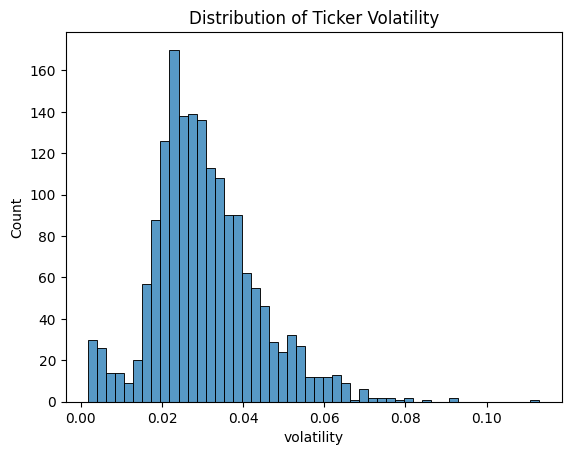

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(volatility['volatility'], bins=50)
plt.title("Distribution of Ticker Volatility")


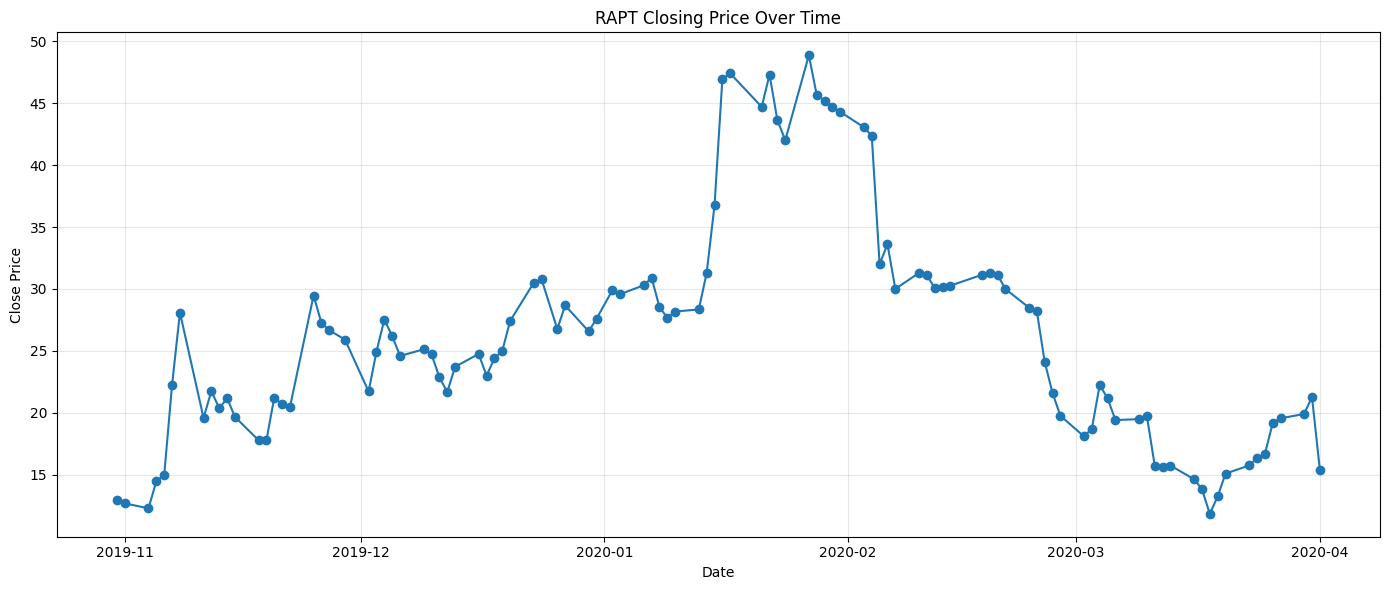

In [19]:
ticker = 'RAPT'
pae_df = stocks_with_sp500[stocks_with_sp500['Ticker'] == ticker]
plt.figure(figsize=(14, 6))
plt.plot(pae_df['Date'], pae_df['Close'], marker='o', linestyle='-')
plt.title(f'{ticker} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
# Test which criteria caught AIRTP
airtp_data = stocks_with_sp500[stocks_with_sp500['Ticker'] == 'AIRTP'].copy()
airtp_sorted = airtp_data.sort_values('Date')

print("=== AIRTP Detailed Analysis ===")

# Check daily changes for sudden drops
daily_changes = airtp_sorted['Close'].pct_change().abs()
large_changes = daily_changes > 0.5
print(f"Days with >50% price change: {large_changes.sum()}")
if large_changes.any():
    print("Large changes detected:")
    large_change_dates = airtp_sorted[large_changes][['Date', 'Close']]
    print(large_change_dates.head())

# Check for extended low price periods  
price_min = airtp_data['Close'].min()
price_max = airtp_data['Close'].max()
low_price_threshold = price_min * 1.1
low_price_days = (airtp_data['Close'] <= low_price_threshold).sum()
low_price_ratio = low_price_days / len(airtp_data)

print(f"\nPrice min: ${price_min:.2f}, max: ${price_max:.2f}")
print(f"Low price threshold (min * 1.1): ${low_price_threshold:.2f}")
print(f"Days at low price: {low_price_days}/{len(airtp_data)} = {low_price_ratio:.3f}")
print(f"Price ratio (max/min): {price_max/price_min:.1f}")

# Summary of why it was caught
print(f"\n=== Summary ===")
print(f"AIRTP removed: {'AIRTP' not in clean_df['Ticker'].values}")
print(f"LMNL removed: {'LMNL' not in clean_df['Ticker'].values}")
print(f"Total tickers removed: {stocks_with_sp500['Ticker'].nunique() - clean_df['Ticker'].nunique()}")

if large_changes.any():
    print("AIRTP caught by: Sudden large price drops (>50% daily change)")
elif (price_max/price_min > 50) and (low_price_ratio > 0.15):
    print("AIRTP caught by: Moderate price drop + extended flat period")

=== AIRTP Detailed Analysis ===
Days with >50% price change: 3
Large changes detected:
             Date      Close
224058 2019-06-13  27.440001
224138 2019-10-07   2.450000
224181 2019-12-06  24.700001

Price min: $2.08, max: $27.44
Low price threshold (min * 1.1): $2.29
Days at low price: 1/205 = 0.005
Price ratio (max/min): 13.2

=== Summary ===
AIRTP removed: True
LMNL removed: True
Total tickers removed: 1065
AIRTP caught by: Sudden large price drops (>50% daily change)
Total tickers removed: 1065
AIRTP caught by: Sudden large price drops (>50% daily change)


In [ ]:
# Remove rows from clean_df that are in either stock_volatile_df or stock_popular_df
volatile_tickers_set = set(stock_volatile_df['Ticker'].unique())
popular_tickers_set = set(stock_popular_df['Ticker'].unique())
exclude_tickers = volatile_tickers_set.union(popular_tickers_set)

cleaned_exclusive_df = clean_df[~clean_df['Ticker'].isin(exclude_tickers)].copy()
cleaned_exclusive_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,...,CQS Symbol,NASDAQ Symbol,NextShares,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date Added,CIK,Founded
9008,2013-09-26,10.000000,10.090000,9.37,9.960000,9.960000,946000.0,AAOI,2013,9,...,NaN,AAOI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9009,2013-09-27,10.440000,10.440000,10.00,10.100000,10.100000,253300.0,AAOI,2013,9,...,NaN,AAOI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9010,2013-09-30,10.000000,10.180000,9.71,10.000000,10.000000,84900.0,AAOI,2013,9,...,NaN,AAOI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9011,2013-10-01,9.950000,10.020000,9.92,10.000000,10.000000,74500.0,AAOI,2013,10,...,NaN,AAOI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9012,2013-10-02,9.990000,10.000000,9.89,9.970000,9.970000,94000.0,AAOI,2013,10,...,NaN,AAOI,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934565,2020-03-26,19.450001,19.450001,18.25,18.639999,18.639999,430500.0,ZUMZ,2020,3,...,NaN,ZUMZ,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7934566,2020-03-27,17.920000,18.570000,17.23,17.469999,17.469999,369600.0,ZUMZ,2020,3,...,NaN,ZUMZ,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7934567,2020-03-30,17.570000,17.670000,16.52,17.430000,17.430000,486700.0,ZUMZ,2020,3,...,NaN,ZUMZ,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7934568,2020-03-31,17.500000,18.530001,17.09,17.320000,17.320000,575600.0,ZUMZ,2020,3,...,NaN,ZUMZ,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cleaned_exclusive_df['Ticker'].value_counts()

Ticker
ZIXI     5094
ZION     5094
AAON     5094
XLNX     5094
WWD      5094
         ... 
FSRVU     104
APXT      102
EXPC      102
QK        102
ORSN      100
Name: count, Length: 1502, dtype: int64